<a href="https://colab.research.google.com/github/jwdagney55/DSPS_JDagney/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS461 Homework 5
Jarod Dagney

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
table1 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW5/hbl2017.csv")

In [3]:
print(table1.shape)
table1.head()

(20, 6)


,#ID,x,y,σy,σx,ρxy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33


In [4]:
def makeAandC(xVals, sigVals, order = 1):
  arrA = np.ones((len(xVals),order + 1))
  arrC = np.zeros((len(sigVals),len(sigVals)))
  for i in range(len(xVals)):
    for j in range(order):
      arrA[i][j+1] = xVals[i] ** (j+1)
    arrC[i][i] = sigVals[i]**2
  return np.matrix(arrA), np.matrix(arrC)

def standardMethod(x, y, sigVals):
  A, C = makeAandC(x, sigVals)
  covariance = np.linalg.inv(A.getT() * np.linalg.inv(C) * A)
  regularSide = A.getT() * np.linalg.inv(C) * np.matrix(y).getT()
  return covariance * regularSide, covariance

## Exercise 1

In [5]:
dataE1 = table1[4:20]

In [6]:
dataE1.head()

,#ID,x,y,σy,σx,ρxy
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84


In [7]:
xVals1 = dataE1.x.values
yVals1 = dataE1.y.values
sigYVals1 = dataE1.σy.values

In [8]:
xVals1

array([203,  58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186,
       125, 218, 146])

In [9]:
fitParams, covariance = standardMethod(xVals1, yVals1, sigYVals1)

In [10]:
fitParams, covariance

(matrix([[34.04772776],
         [ 2.23992083]]), matrix([[ 3.32922601e+02, -1.88954491e+00],
         [-1.88954491e+00,  1.16166311e-02]]))

In [11]:
slopeUnc = np.sqrt(np.asarray(covariance)[1][1]);
intUnc = np.sqrt(np.asarray(covariance)[0][0]);

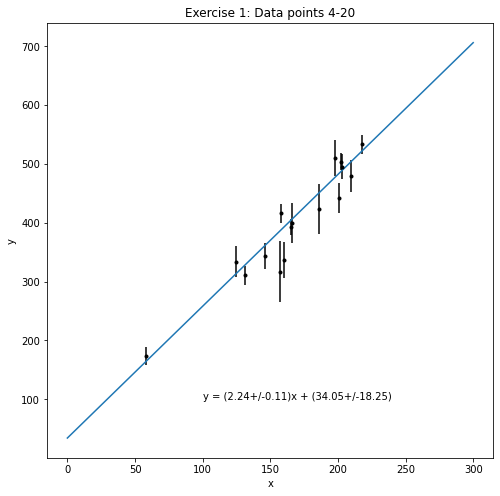

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
ax.xlim = ((55, 300))
ax.ylim = ((0, 700))
ax.set_xlabel('x')
ax.set_ylabel('y')
x = np.linspace(0,300)
y = fitParams[0][0] + np.matrix(x).getT() * np.asarray(fitParams[1][0])
ax.plot(x,y)
ax.errorbar(xVals1, yVals1, yerr=sigYVals1, fmt='k.')
ax.set_title("Exercise 1: Data points 4-20")

ax.text(100, 100, "y = ({:.2f}+/-{:.2f})x + ({:.2f}+/-{:.2f})".format(np.asarray(fitParams)[1][0], slopeUnc, np.asarray(fitParams)[0][0], intUnc));

Figure 1. Above shows the data points between 4 and 20 and their uncertainties as well as the best fit line. The best fit has a slope of 2.24 and a y-intercept of 34.05. These values were found using the standard linear algebra model presented in Section 1 of the article "Data analysis recipes:
Fitting a model to data" by David Hogg.

# Exercise 2

In [13]:
dataE2 = table1
print(dataE2.shape)
xVals2 = dataE2.x.values
yVals2 = dataE2.y.values
sigYVals2 = dataE2.σy

(20, 6)


In [14]:
fitParams, covariance = standardMethod(xVals2, yVals2, sigYVals2)
slopeUnc = np.sqrt(np.asarray(covariance)[1][1]);
intUnc = np.sqrt(np.asarray(covariance)[0][0]);

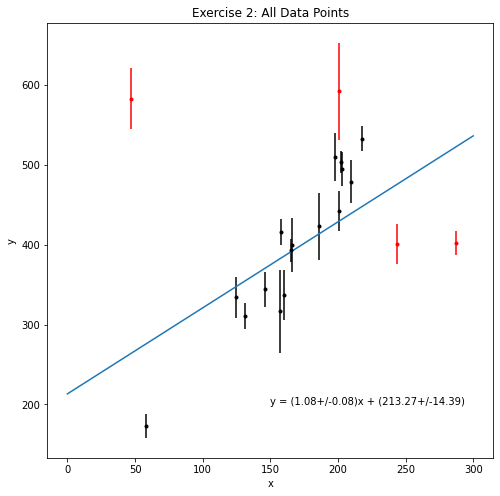

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax.xlim = ((55, 300))
ax.ylim = ((0, 700))
ax.set_xlabel('x')
ax.set_ylabel('y')
x = np.linspace(0,300)
y = fitParams[0][0] + np.matrix(x).getT() * np.asarray(fitParams[1][0])
ax.plot(x,y)
ax.errorbar(xVals2[0:4], yVals2[0:4], yerr=sigYVals2[0:4], fmt='r.')
ax.errorbar(xVals2[4:], yVals2[4:], yerr=sigYVals2[4:], fmt='k.')


ax.set_title("Exercise 2: All Data Points")

ax.text(150, 200, "y = ({:.2f}+/-{:.2f})x + ({:.2f}+/-{:.2f})".format(np.asarray(fitParams)[1][0], slopeUnc, np.asarray(fitParams)[0][0], intUnc));

### Figure 2. Plot of the entire data set, new data points are in red. These 4 data points have significantly changed the fit parameters. The slope was cut in half and the y-intercept, increased over 6 times. What is troubling is that the uncertainty variance for these parameters, m and b, decreased. I would expect that when adding 4 data points that greatly alter the best fit line, then the uncertainty in those parameters would increase. However that is not the case.

# Exercise 3: Redo Exercise 1 with a second order column

In [16]:
def generalMethod(x, y, sigVals, order=1):
  A, C = makeAandC(x, sigVals, order)
  covariance = np.linalg.inv(A.getT() * np.linalg.inv(C) * A)
  regularSide = A.getT() * np.linalg.inv(C) * np.matrix(y).getT()
  return covariance * regularSide, covariance


In [17]:
dataE3 = dataE1

In [18]:
xVals3 = dataE1.x.values
yVals3 = dataE1.y.values
sigYVals3 = dataE1.σy.values

In [19]:
fitParams, covariance = generalMethod(xVals3, yVals3, sigYVals3, order=2)

In [20]:
covariance

matrix([[ 1.51410913e+03, -2.14671957e+01,  6.99004580e-02],
        [-2.14671957e+01,  3.36107642e-01, -1.15856956e-03],
        [ 6.99004580e-02, -1.15856956e-03,  4.13658125e-06]])

In [21]:
qUnc = np.sqrt(np.asarray(covariance)[2][2])
slopeUnc = np.sqrt(np.asarray(covariance)[1][1]);
intUnc = np.sqrt(np.asarray(covariance)[0][0]);

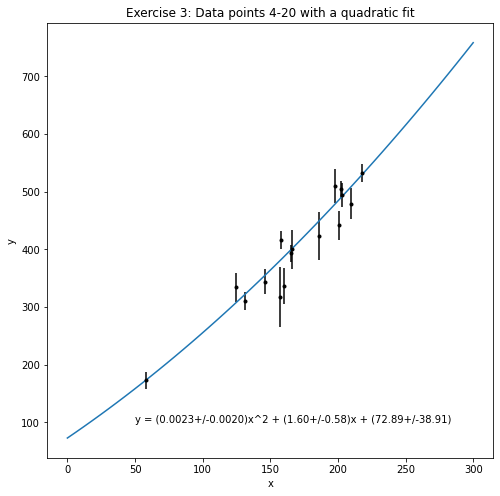

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
ax.xlim = ((55, 300))
ax.ylim = ((0, 700))
ax.set_xlabel('x')
ax.set_ylabel('y')
x = np.linspace(0,300)
x2 = [x[i]**2 for i in range(len(x))]
y = fitParams[0][0] + np.matrix(x).getT() * np.asarray(fitParams[1][0]) + np.matrix(x2).getT() * np.asarray(fitParams[2][0])
ax.plot(x,y)
ax.errorbar(xVals3, yVals3, yerr=sigYVals3, fmt='k.')
ax.set_title("Exercise 3: Data points 4-20 with a quadratic fit")

ax.text(50, 100, "y = ({:.4f}+/-{:.4f})x^2 + ({:.2f}+/-{:.2f})x + ({:.2f}+/-{:.2f})".format(np.asarray(fitParams)[2][0], qUnc, np.asarray(fitParams)[1][0], slopeUnc, np.asarray(fitParams)[0][0], intUnc));

## Figure 3. Plot of data points 4-20 from Table 1. This time wth a quadractic fit. The uncertainties for the first order term and the zeroth order term have increased from exercise 1.

# Exercise 4

Formulation of likelihood

$L = \Pi_{i=1}^{N} p(t_i | \sigma_{t_i}, T) = \Pi_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma_{ti}^{2}}}exp({-[\frac{t_i-T}{2\sigma_{ti}^{2}}]^2})$

$ln(L) = ln(\Pi_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma_{ti}^{2}}})-\Sigma_{i=1}^{N}(\frac{t_i-T}{2\sigma_{ti}^{2}})^2$

$ln(L) = K - \Sigma_{i=1}^{N}(\frac{t_i-T}{2\sigma_{ti}^{2}})^2$ 

K is some constant.

-----------------------------------------
Derivitive attmempt

$\frac{d}{d_{t_i}}ln(L) = -2\Sigma_{i=1}^N\frac{t_i - T}{2\sigma^2_{ti}}$

$\frac{d}{d_{t_i}}ln(L) = - \Sigma_{i=1}^N\frac{t_i - T}{\sigma^2_{ti}}$